In [367]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta

In this block read the first 2 file in Bearing1_4. And visualization the data.

## Question 1

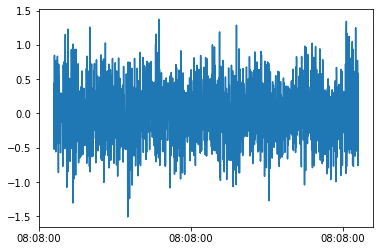

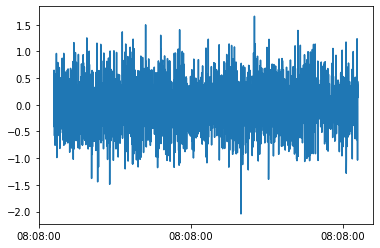

<Figure size 432x288 with 0 Axes>

In [368]:

df=pd.read_csv("E:/MLPratikum/Abscluss/measurement_data/Bearing1_4/acc_00001.csv",sep=';',header=None)

df.append(pd.read_csv("E:/MLPratikum/Abscluss/measurement_data/Bearing1_4/acc_00002.csv",sep=';',header=None))

df.columns=["Stunde","Minute","Sekunde","Mikrosekunde","Horiz.Beschl.","Vert.Beschl."]
df.head()
timeList=[]

for row in range(len(df)):
    dt=datetime(year=datetime.now().year,month=datetime.now().month,day=datetime.now().day,hour=df.loc[row,"Stunde"],minute=df.loc[row,"Minute"],second=df.loc[row,"Sekunde"],microsecond=int(df.loc[row,"Mikrosekunde"]))
    timeList.append(dt)

plt.plot(timeList,df["Horiz.Beschl."])
plt.figure(1)
plt.show()
plt.plot(timeList,df["Vert.Beschl."])
plt.figure(2)
plt.show()



## define the two function, which aim to build dataset

In [369]:
# This function use to read all csv file in a folder.
# @params: inputDir,The root folder 
#          inputBearing,The folder,which u want to read
# @return: resDf, The dataframe which include the features in one acc_#.csv file
def readDataSet(inputDir,inputBearing):
    bearingFloder=os.path.join(inputDir,inputBearing)
    stateFileName=inputBearing+"_health_state.csv"
    # print(stateFileName)
    stateDf=pd.read_csv(os.path.join(bearingFloder,stateFileName))
    
    resDf=pd.DataFrame(columns=['Time','Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median','Vert.Std',                                     'Vert.Max','Vert.Min','State'])


    allCsvFile=os.listdir(os.path.join(inputDir,inputBearing))
    for singleCsv in allCsvFile:
        if singleCsv != (inputBearing+"_health_state.csv"):
            timeList=[]
            if inputBearing=="Bearing1_4":
                singleCsvDf=pd.read_csv(os.path.join(bearingFloder,singleCsv),sep=';',header=None)
            else:
                singleCsvDf=pd.read_csv(os.path.join(bearingFloder,singleCsv),header=None)
            singleCsvDf.columns=["Stunde","Minute","Sekunde","Mikrosekunde","Horiz.Beschl.","Vert.Beschl."]
            horizMedian=singleCsvDf["Horiz.Beschl."].mean()
            vertMedian=singleCsvDf["Vert.Beschl."].mean()
            horizStd=singleCsvDf["Horiz.Beschl."].std()
            vertStd=singleCsvDf["Vert.Beschl."].std()
            horizMax=singleCsvDf["Horiz.Beschl."].max()
            horizMin=singleCsvDf["Horiz.Beschl."].min()
            vertMax=singleCsvDf["Vert.Beschl."].max()
            vertMin=singleCsvDf["Vert.Beschl."].min()
            state=int(stateDf.loc[stateDf["file"].str.contains(singleCsv),"state"])

            for row in range(len(singleCsvDf)):
                dt=datetime(year=datetime.now().year,month=datetime.now().month,day=datetime.now().day,hour=singleCsvDf.loc[row,"Stunde"],
                        minute=singleCsvDf.loc[row,"Minute"],second=singleCsvDf.loc[row,"Sekunde"],microsecond=int(0.1*singleCsvDf.loc[row,"Mikrosekunde"]))
                timeList.append(dt)
            time=timeList[0]+sum((time_i-timeList[0] for time_i in timeList),timedelta(0))/len(timeList)


        resDict={
            'Time': time,
            'Horiz.Median':horizMedian,
            'Horiz.Std':horizStd,
            'Horiz.Max':horizMax,
            'Horiz.Min':horizMin,
            'Vert.Median':vertMedian,
            'Vert.Std':vertStd,
            'Vert.Max':vertMax,
            'Vert.Min':vertMin,
            'State':state
        }
       
        resDf=resDf.append([resDict],ignore_index=True)

    return resDf

# This function is use to read all files in the root folder.And save the feastures in root folder
# @params: inputDir,the root folder
#          feature: list of which feature want to got
# @return: x, feratures
#          y, labels
def bulidDataset(inputDir,feature,fileName):
    x=pd.DataFrame(columns=feature)
    y=pd.DataFrame(columns=["State"])

    if not os.path.exists(fileName+'.csv'):

        bearingFolder=os.listdir(inputDir)
        resDf=pd.DataFrame(columns=['Time','Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median',                                                'Vert.Std','Vert.Max','Vert.Min','State'])
        for iterInputBearing in bearingFolder:
            print(iterInputBearing)
            resDf=resDf.append(readDataSet(inputDir,iterInputBearing))

        resDf.to_csv("middelware.csv")
        x=resDf[feature]
        y=resDf["State"]
        x.to_csv(fileName+".csv")
        y.to_csv(fileName+"_label.csv")
    else:
        x=pd.read_csv(fileName+".csv")
        y=pd.read_csv(fileName+"_label.csv",header=None)
    return x,y[1]

In [370]:
inputDir="E:/MLPratikum/Abscluss/measurement_data/"
inputBearing="Bearing1_4"
bearingFloder=os.path.join(inputDir,inputBearing)
res=pd.DataFrame(columns=['Time','Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median','Vert.Std',                                     'Vert.Max','Vert.Min','State'])
res=readDataSet(inputDir,inputBearing)
res.head()



,Time,Horiz.Median,Horiz.Std,Horiz.Max,Horiz.Min,Vert.Median,Vert.Std,Vert.Max,Vert.Min,State
0,2021-03-04 08:08:00.047502,0.006386,0.403295,1.373,-1.511,0.001648,0.454933,1.658,-2.045,0
1,2021-03-04 08:08:10.047502,-0.008861,0.390664,1.299,-1.446,0.006299,0.459195,1.537,-1.685,0
2,2021-03-04 08:08:20.047502,-0.006355,0.391883,1.313,-1.505,-0.008353,0.491408,2.161,-1.872,0
3,2021-03-04 08:08:30.047502,-0.005948,0.415829,1.508,-1.476,-0.001811,0.474722,1.637,-2.033,0
4,2021-03-04 08:08:40.047502,-0.001927,0.386722,1.334,-1.225,0.006672,0.511625,1.967,-1.690,0


## Question 2
## Read Bearing1_4
Read Bearing1_4 and observ the dataset

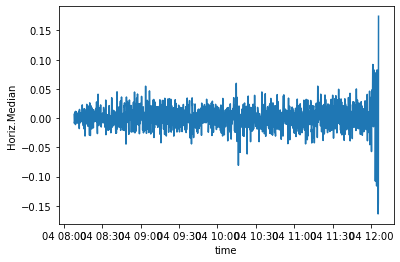

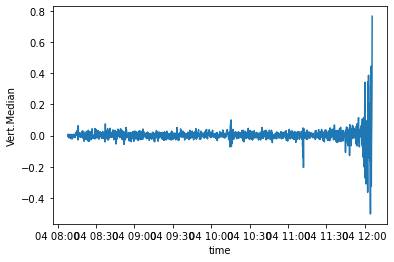

In [371]:
plt.plot(res["Time"],res["Horiz.Median"])
plt.xlabel("time")
plt.ylabel("Horiz.Median")
plt.show()
plt.plot(res["Time"],res["Vert.Median"])
plt.xlabel("time")
plt.ylabel("Vert.Median")
plt.show()

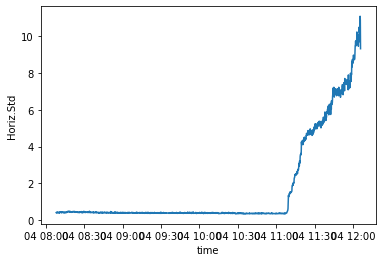

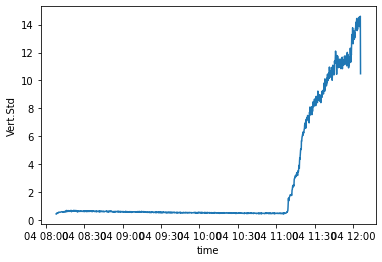

In [372]:
plt.plot(res["Time"],res["Horiz.Std"])
plt.xlabel("time")
plt.ylabel("Horiz.Std")
plt.show()
plt.plot(res["Time"],res["Vert.Std"])
plt.xlabel("time")
plt.ylabel("Vert.Std")
plt.show()

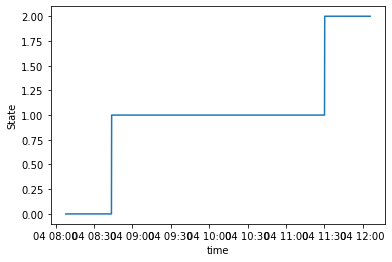

In [373]:
plt.plot(res["Time"],res["State"])
plt.xlabel("time")
plt.ylabel("State")
plt.show()

## Question 3

In [374]:
inputDir="E:/MLPratikum/Abscluss/measurement_data/"
feature=['Horiz.Median','Horiz.Std','Vert.Median','Vert.Std']
print("feature_without_Maxmin"+".csv")
X=pd.DataFrame(columns=feature)
y=pd.DataFrame(columns=["State"])

X,y=bulidDataset(inputDir,feature,"feature_without_Maxmin")

feature_without_Maxmin.csv


## Question 4
## Rebuild the label
 label 0 and 1 as 0.and label 2 as 1

In [375]:
y[y==1]=0
y[y==2]=1


In [376]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X[["Horiz.Median","Horiz.Std","Vert.Median","Vert.Std"]],y.astype('int'),test_size=0.25)



## Question 5

At first use SVM

In [377]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

clf =svm.SVC()
clf.fit(X_train,y_train)
print(classification_report(y_test,clf.predict(X_test)))
print("~~~~~~~~~~train acc is~~~~~~~~~~")
print(accuracy_score(y_train,clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2787
           1       0.93      0.20      0.33       472

    accuracy                           0.88      3259
   macro avg       0.91      0.60      0.63      3259
weighted avg       0.89      0.88      0.85      3259

~~~~~~~~~~train acc is~~~~~~~~~~
0.8714066496163683


Then use random froest

In [378]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=2021,max_depth=3)
rfc.fit(X_train,y_train)
print(classification_report(y_test,rfc.predict(X_test)))
print("~~~~~~~~~~train acc is~~~~~~~~~~")
print(accuracy_score(y_train,rfc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2787
           1       0.88      0.25      0.39       472

    accuracy                           0.89      3259
   macro avg       0.88      0.62      0.67      3259
weighted avg       0.89      0.89      0.86      3259

~~~~~~~~~~train acc is~~~~~~~~~~
0.8757033248081841


Then Use GBDT

In [379]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=2,random_state=2021)
gbc.fit(X_train,y_train)

print(classification_report(y_test,gbc.predict(X_test)))
print("~~~~~~~~~~train acc is~~~~~~~~~~")
print(accuracy_score(y_train,gbc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2787
           1       0.91      0.26      0.41       472

    accuracy                           0.89      3259
   macro avg       0.90      0.63      0.67      3259
weighted avg       0.89      0.89      0.86      3259

~~~~~~~~~~train acc is~~~~~~~~~~
0.8797953964194374


Then use neueal network

In [380]:
import tensorflow as tf

In [381]:
myModel= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu",input_shape=[4]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
myModel.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_200 (Dense)            (None, 10)                50        
_________________________________________________________________
dense_201 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_202 (Dense)            (None, 1)                 11        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [382]:
adam=tf.keras.optimizers.Adam(learning_rate=0.001)
myModel.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])


In [383]:
myModel.fit(X_train,y_train,batch_size=32,epochs=25)

Epoch 1/25
306/306 [==============================] - 0s 696us/step - loss: 0.5233 - accuracy: 0.8416
Epoch 2/25
306/306 [==============================] - 0s 673us/step - loss: 0.4004 - accuracy: 0.8597
Epoch 3/25
306/306 [==============================] - 0s 670us/step - loss: 0.3997 - accuracy: 0.8599
Epoch 4/25
306/306 [==============================] - 0s 670us/step - loss: 0.3992 - accuracy: 0.8594
Epoch 5/25
306/306 [==============================] - 0s 725us/step - loss: 0.3981 - accuracy: 0.8595
Epoch 6/25
306/306 [==============================] - 0s 680us/step - loss: 0.3973 - accuracy: 0.8594
Epoch 7/25
306/306 [==============================] - 0s 709us/step - loss: 0.3964 - accuracy: 0.8594
Epoch 8/25
306/306 [==============================] - 0s 696us/step - loss: 0.3957 - accuracy: 0.8590
Epoch 9/25
306/306 [==============================] - 0s 676us/step - loss: 0.3956 - accuracy: 0.8595
Epoch 10/25
306/306 [==============================] - 0s 709us/step - loss: 0.394

In [384]:
res=[]
dnnRes=myModel.predict(X_test)
for i in dnnRes:
    if(i>0.5):
        res.append(1)
    else:
        res.append(0)
print(classification_report(y_test,res))


              precision    recall  f1-score   support

           0       0.87      0.99      0.93      2787
           1       0.73      0.11      0.19       472

    accuracy                           0.87      3259
   macro avg       0.80      0.55      0.56      3259
weighted avg       0.85      0.87      0.82      3259



Then try to add max and min as features

In [385]:
inputDir="E:/MLPratikum/Abscluss/measurement_data/"
feature=['Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median','Vert.Std',                                     'Vert.Max','Vert.Min']

X_maxmin=pd.DataFrame(columns=feature)
y_maxmin=pd.DataFrame(columns=["State"])

X_maxmin,y_maxmin=bulidDataset(inputDir,feature,"feature_with_Maxmin")

In [386]:
y_maxmin[y_maxmin==1]=0
y_maxmin[y_maxmin==2]=1


In [387]:
X_maxmin=X_maxmin[['Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median','Vert.Std','Vert.Max','Vert.Min']]

X_train,X_test,y_train,y_test = train_test_split(X_maxmin[['Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median','Vert.Std','Vert.Max','Vert.Min']],y.astype('int'),test_size=0.25)
print(X_train)

       Horiz.Median  Horiz.Std  Horiz.Max  Horiz.Min  Vert.Median  Vert.Std  \
2097       0.006183   0.291981      1.327     -1.190    -0.001690  0.466870   
6496       0.011872   0.390385      1.416     -1.377    -0.038829  0.491437   
12729     -0.017406   0.276907      1.092     -1.325     0.001827  0.411392   
6221       0.016358   0.331015      1.601     -2.191    -0.002811  0.383211   
3987      -0.000682   0.489063      2.151     -2.208    -0.002084  0.551777   
10713      0.001370   0.265924      0.955     -0.970     0.008290  0.366834   
191       -0.008849   0.401226      1.394     -1.352    -0.024837  0.609925   
3363       0.014405   0.256624      1.182     -1.061    -0.004741  0.432115   
3368      -0.024042   0.250006      0.838     -0.902    -0.011823  0.407847   
2817      -0.014531   0.266683      0.909     -0.932    -0.010704  0.412960   
4998       0.016053   0.336303      2.111     -1.359     0.003704  0.365751   
11094      0.017242   0.275138      0.911     -0.912

SVM

In [388]:
clf =svm.SVC()
clf.fit(X_train,y_train)
print(classification_report(y_test,clf.predict(X_test)))
print("~~~~~~~~~~train acc is~~~~~~~~~~")
print(accuracy_score(y_train,clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2787
           1       0.81      0.19      0.31       472

    accuracy                           0.88      3259
   macro avg       0.84      0.59      0.62      3259
weighted avg       0.87      0.88      0.84      3259

~~~~~~~~~~train acc is~~~~~~~~~~
0.8715089514066496


Random Forest


In [389]:
rfc=RandomForestClassifier(random_state=2021,max_depth=3)
rfc.fit(X_train,y_train)
print(classification_report(y_test,rfc.predict(X_test)))
print("~~~~~~~~~~train acc is~~~~~~~~~~")
print(accuracy_score(y_train,rfc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2787
           1       0.83      0.26      0.40       472

    accuracy                           0.89      3259
   macro avg       0.86      0.63      0.67      3259
weighted avg       0.88      0.89      0.86      3259

~~~~~~~~~~train acc is~~~~~~~~~~
0.8791815856777494


GBDT

In [390]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=2,random_state=2021)
gbc.fit(X_train,y_train)

print(classification_report(y_test,gbc.predict(X_test)))
print("~~~~~~~~~~train acc is~~~~~~~~~~")
print(accuracy_score(y_train,gbc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2787
           1       0.83      0.28      0.42       472

    accuracy                           0.89      3259
   macro avg       0.86      0.64      0.68      3259
weighted avg       0.88      0.89      0.86      3259

~~~~~~~~~~train acc is~~~~~~~~~~
0.887161125319693


NN

In [391]:
myModel= tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu",input_shape=[8]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
myModel.summary()

adam=tf.keras.optimizers.Adam(learning_rate=0.001)
myModel.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])
myModel.fit(X_train,y_train,batch_size=32,epochs=25)

res=[]
dnnRes=myModel.predict(X_test)
for i in dnnRes:
    if(i>0.5):
        res.append(1)
    else:
        res.append(0)
print(classification_report(y_test,res))

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_203 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_204 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_205 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_206 (Dense)            (None, 1)                 11        
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
306/306 [==============================] - 0s 686us/step - loss: 0.5119 - accuracy: 0.8346
Epoch 2/25
306/306 [==============================] - 0s 709us/step - loss: 0.3879 - accuracy: 0.8617
Epoch 3/25
306/306 [=============================

## Summary


    In those questions. When i add max and min value. The result is a little bit better. The accuracy is higher and
    the Recall is higher. But I think we just use the mean and std value to present the status, the time relationship 
    is ignored.  

## Try 3 class

In [392]:
inputDir="E:/MLPratikum/Abscluss/measurement_data/"
feature=['Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median','Vert.Std',                                     'Vert.Max','Vert.Min']

X_three_class=pd.DataFrame(columns=feature)
y_three_class=pd.DataFrame(columns=["State"])

X_three_class,y_three_class=bulidDataset(inputDir,feature,"feature_with_Maxmin")
X_train,X_test,y_train,y_test = train_test_split(X_three_class[['Horiz.Median','Horiz.Std','Horiz.Max','Horiz.Min','Vert.Median','Vert.Std','Vert.Max','Vert.Min']],y_three_class.astype('int'),test_size=0.25)
y_train=tf.keras.utils.to_categorical(y_train,3)



In [393]:
myModel= tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation="relu",input_shape=[8]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])
myModel.summary()

adam=tf.keras.optimizers.Adam(learning_rate=0.01)
myModel.compile(optimizer=adam,loss="categorical_crossentropy",metrics=["accuracy"])
history=myModel.fit(X_train,y_train,batch_size=32,epochs=50)



Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_208 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_209 (Dense)            (None, 100)               1100      
_________________________________________________________________
dense_210 (Dense)            (None, 10)                1010      
_________________________________________________________________
dense_211 (Dense)            (None, 3)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
306/306 [==============================] - 0s 722us/step - loss: 0.7654 - accuracy: 0.7107
Epoch 2/50
306/

In [394]:
res=[np.argmax(it) for it in myModel.predict(X_test)]

print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62       516
           1       0.79      0.97      0.87      2265
           2       0.77      0.32      0.45       478

    accuracy                           0.80      3259
   macro avg       0.82      0.59      0.65      3259
weighted avg       0.80      0.80      0.77      3259



## RNN

        In the next chapter, i try to use RNN(LSTM). At first rebuild the dataset. each files save 50 group values. And use LSTM to train new model with new dataset. 

In [395]:
from tqdm import  tqdm

def readDataSetCNN(inputDir,inputBearing):
    bearingFloder=os.path.join(inputDir,inputBearing)
    stateFileName=inputBearing+"_health_state.csv"
    # print(stateFileName)
    stateDf=pd.read_csv(os.path.join(bearingFloder,stateFileName))
    
    res=[]
    labelRes=[]

    allCsvFile=os.listdir(os.path.join(inputDir,inputBearing))
    for singleCsv in tqdm(allCsvFile):
        middelRes=[]
        if singleCsv != (inputBearing+"_health_state.csv"):
            timeList=[]
            if inputBearing=="Bearing1_4":
                singleCsvDf=pd.read_csv(os.path.join(bearingFloder,singleCsv),sep=';',header=None)
            else:
                singleCsvDf=pd.read_csv(os.path.join(bearingFloder,singleCsv),header=None)
            singleCsvDf.columns=["Stunde","Minute","Sekunde","Mikrosekunde","Horiz.Beschl.","Vert.Beschl."]

            state=int(stateDf.loc[stateDf["file"].str.contains(singleCsv),"state"])

            iterStep=int(len(singleCsvDf)/50)
            # print(iterStep)
            for row in range(len(singleCsvDf)):
                if row % iterStep==0 :
                    middelRes.append([singleCsvDf.loc[row,"Horiz.Beschl."],singleCsvDf.loc[row,"Vert.Beschl."]])

            res.append(middelRes)
            labelRes.append(state)

    return res,labelRes

def bulidDatasetCNN(inputDir,):
    x=pd.DataFrame(columns=feature)
    y=pd.DataFrame(columns=["State"])

    
    bearingFolder=os.listdir(inputDir)
    res=[]
    label=[]
    for iterInputBearing in bearingFolder:
        print(iterInputBearing)
        iterRes,iterLabel=readDataSetCNN(inputDir,iterInputBearing)
        res=res+iterRes
        label=label+iterLabel
        
   
    return res,label

In [396]:
inputDir="E:/MLPratikum/Abscluss/measurement_data/"
inputBearing="Bearing1_4"
bearingFloder=os.path.join(inputDir,inputBearing)
res=[]
label=[]
res,label=readDataSetCNN(inputDir,inputBearing)
print((np.array(res)).shape)
print(len(label))

100%|██████████| 1429/1429 [00:10<00:00, 142.11it/s]
(1428, 51, 2)
1428


In [397]:
X=[]
y=[]
X,y=bulidDatasetCNN(inputDir)

100%|██████████| 435/435 [00:02<00:00, 148.26it/s]


In [398]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [399]:
print(X_train[1])
print(y_train.shape)
y_train=tf.keras.utils.to_categorical(y_train,3)

[[-0.241 -0.362]
 [ 0.114  0.47 ]
 [ 0.116 -0.747]
 [-0.234 -0.083]
 [-0.149 -0.083]
 [ 0.838 -0.654]
 [-0.203 -0.311]
 [-0.371  0.438]
 [-0.056  0.403]
 [ 0.443  0.42 ]
 [-0.167 -0.222]
 [ 0.257  0.078]
 [-0.473 -0.041]
 [ 0.083  0.078]
 [-0.139 -0.17 ]
 [-0.021 -0.395]
 [-0.528  0.592]
 [ 0.297 -0.214]
 [ 0.054  0.029]
 [ 0.785 -0.506]
 [ 0.184 -0.236]
 [-0.331 -0.032]
 [ 0.335  0.51 ]
 [ 0.247 -0.053]
 [ 0.396  0.406]
 [-0.135  0.594]
 [ 0.059  0.156]
 [-0.158  0.51 ]
 [ 0.007  0.044]
 [ 0.422  0.132]
 [-0.332  0.127]
 [-0.014 -0.041]
 [ 0.853 -0.266]
 [ 0.054 -0.498]
 [ 0.354 -0.32 ]
 [ 0.278  0.013]
 [-0.311  0.077]
 [-0.223  0.154]
 [ 0.48  -0.076]
 [ 0.048  0.075]
 [ 0.068 -0.424]
 [ 0.067  0.167]
 [-0.429 -0.288]
 [ 0.125  0.092]
 [-0.015  0.125]
 [-0.132 -0.138]
 [-0.364  0.478]
 [ 0.452 -0.133]
 [ 0.019 -0.243]
 [ 0.31  -0.332]
 [ 0.2   -0.678]]
(9768,)


In [400]:
MyCNNModel=tf.keras.Sequential([
    tf.keras.layers.LSTM(20,input_shape=[51,2]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])
MyCNNModel.build(input_shape=(51,2))
MyCNNModel.summary()

adam=tf.keras.optimizers.Adam(learning_rate=0.001)
MyCNNModel.compile(optimizer=adam,loss="categorical_crossentropy",metrics=["accuracy"])
history=MyCNNModel.fit(X_train,y_train,batch_size=64,epochs=50)

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 20)                1840      
_________________________________________________________________
flatten_39 (Flatten)         (None, 20)                0         
_________________________________________________________________
dense_212 (Dense)            (None, 32)                672       
_________________________________________________________________
dense_213 (Dense)            (None, 128)               4224      
_________________________________________________________________
dense_214 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_215 (Dense)            (None, 3)                 387       
Total params: 23,635
Trainable params: 23,635
Non-trainable params: 0
_________________________________________________

In [401]:
res=[np.argmax(it) for it in MyCNNModel.predict(X_test)]

print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.74      0.27      0.39       515
           1       0.76      0.97      0.85      2289
           2       0.79      0.21      0.33       453

    accuracy                           0.76      3257
   macro avg       0.76      0.48      0.52      3257
weighted avg       0.76      0.76      0.71      3257



But it is not work